In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import csv

In [2]:
def process_enc_data(raw_data):

    indices = raw_data[raw_data.columns[0]][2:]
    data = raw_data[2:]
    # set indices of data to indices
    data.index = indices
    # increase index by 1
    data.index = data.index.astype(int) + 1
    data.index.name = 'idx'
    dfs = {}
    names = ['train_loss', 'val_loss', '1step_val_acc', '1step_val_loss']
    col_names = ['mean', 'min', 'max', 'std']
    for i in range(0, 4):
        cols = data.columns[i+1:17:4]
        df = data[cols]
        df.columns = col_names
        # convert all values to float
        for col in col_names:
            df[col] = df[col].astype(float)
        dfs[names[i]] = df
    return dfs

def process_cla_data(raw_data):

    indices = raw_data[raw_data.columns[0]][2:]
    data = raw_data[2:]
    # set indices of data to indices
    data.index = indices
    # increase index by 1
    data.index = data.index.astype(int) + 1
    data.index.name = 'idx'
    dfs = {}
    names = ['train_loss', 'train_acc', 'val_loss', 'val_acc']
    col_names = ['mean', 'min', 'max', 'std']
    for i in range(0, 4):
        cols = data.columns[i+1:17:4]
        df = data[cols]
        df.columns = col_names
        # convert all values to float
        for col in col_names:
            df[col] = df[col].astype(float)
        dfs[names[i]] = df
    return dfs

In [3]:
example = "MNIST"
experiment = 'HAugPC2-stop_at-2'
path = f"Deep_Learning/Representation_Learning/Examples/{example}/out/logs/{experiment}/"
names = os.listdir(path)
encoder_data = {}
classifier_data = {}
for name in names:
    print(name)
    enc_path = path + name + '/encoder/reduction.csv'
    cla_path = path + name + '/classifier/reduction.csv'
    # load encoder data as pd dataframe
    if os.path.exists(enc_path):
        encoder_data[name] = process_enc_data(pd.read_csv(enc_path))
    # load classifier data as pd dataframe
    if os.path.exists(cla_path):
        classifier_data[name] = process_cla_data(pd.read_csv(cla_path))


0
1
2
3
4
5


C:\Users\joeag\AppData\Local\Temp\ipykernel_26016\2643724341.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(float)
C:\Users\joeag\AppData\Local\Temp\ipykernel_26016\2643724341.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(float)
C:\Users\joeag\AppData\Local\Temp\ipykernel_26016\2643724341.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [4]:
for key in classifier_data.keys():
    print(f'{key} best val acc: {classifier_data[key]["val_acc"]["max"].max():.3f}')

0 best val acc: 0.974
1 best val acc: 0.971
2 best val acc: 0.977
3 best val acc: 0.973
4 best val acc: 0.960
5 best val acc: 0.918


In [9]:
for key in classifier_data.keys():
    print(f'{key} best val acc: {classifier_data[key]["val_acc"]["max"].max():.3f}')

0 best val acc: 0.971
1 best val acc: 0.972
2 best val acc: 0.978
3 best val acc: 0.971
4 best val acc: 0.960
5 best val acc: 0.966


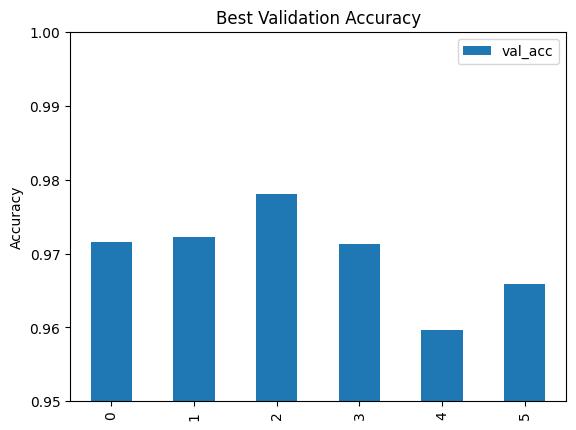

In [13]:
# plot bar chart of best val acc
data = {}
for key in classifier_data.keys():
    data[key] = classifier_data[key]["val_acc"]["max"].max()
df = pd.DataFrame(data, index=[0])
df = df.T
df.columns = ['val_acc']
# df = df.sort_values(by='val_acc', ascending=False)
df.plot(kind='bar')
plt.ylabel('Accuracy')
plt.ylim(0.95, 1)
plt.title('Best Validation Accuracy')
plt.show()

In [5]:
encoder_data.keys()

dict_keys(['0', '1', '2', '3', '4', '5'])

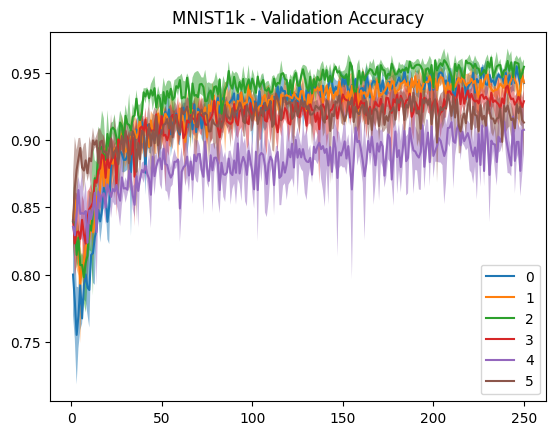

In [6]:
for key in encoder_data.keys():
    plt.plot(encoder_data[key]['1step_val_acc']['mean'], label=key)
    plt.fill_between(encoder_data[key]['1step_val_acc'].index, encoder_data[key]['1step_val_acc']['min'], encoder_data[key]['1step_val_acc']['max'], alpha=0.5)

plt.title('MNIST1k - Validation Accuracy')
plt.legend()
plt.show()


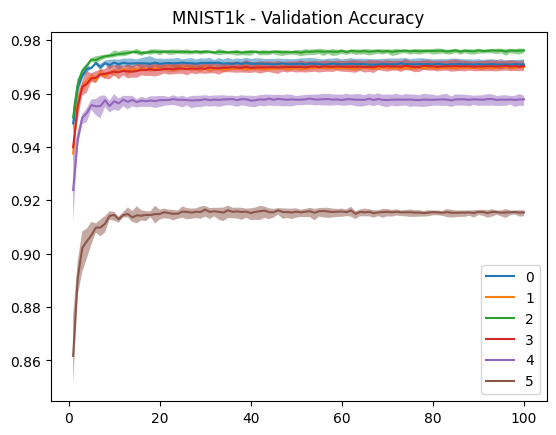

In [5]:
for key in encoder_data.keys():
    plt.plot(classifier_data[key]['val_acc']['mean'], label=key)
    plt.fill_between(classifier_data[key]['val_acc'].index, classifier_data[key]['val_acc']['min'], classifier_data[key]['val_acc']['max'], alpha=0.5)

plt.title('MNIST1k - Validation Accuracy')
plt.legend()
plt.show()

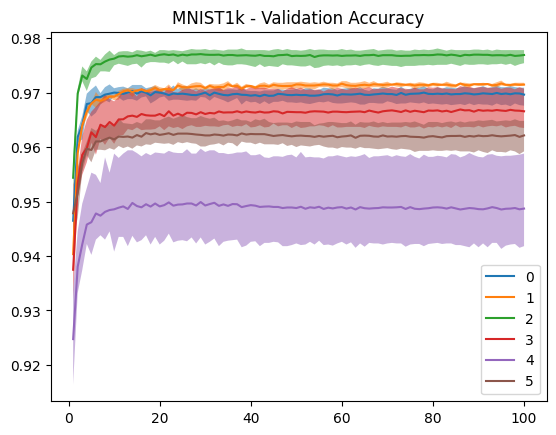

In [7]:
for key in encoder_data.keys():
    plt.plot(classifier_data[key]['val_acc']['mean'], label=key)
    plt.fill_between(classifier_data[key]['val_acc'].index, classifier_data[key]['val_acc']['min'], classifier_data[key]['val_acc']['max'], alpha=0.5)

plt.title('MNIST1k - Validation Accuracy')
plt.legend()
plt.show()

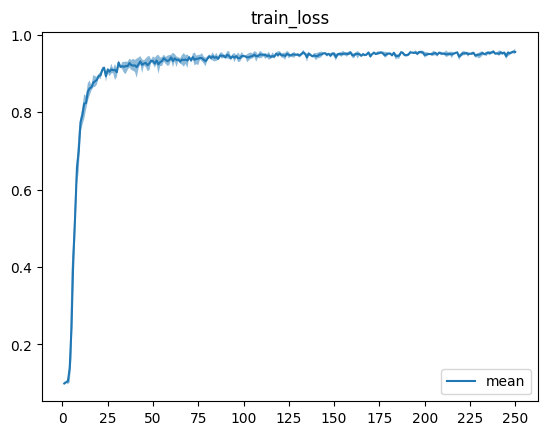

In [154]:
# plot p_enc_data['train_loss']['mean'] column as a line plot
# and p_enc_data['train_loss']['std'] as shaded area
# plt.plot(p_enc_data['train_loss']['mean'], label='train_loss')
plt.plot(p_enc_data['1step_val_acc']['mean'], label='mean')
# plt.plot(p_enc_data['1step_val_acc']['min'], label='min')
# plt.plot(p_enc_data['1step_val_acc']['max'], label='max')
plt.fill_between(p_enc_data['1step_val_acc'].index, p_enc_data['1step_val_acc']['min'], p_enc_data['1step_val_acc']['max'], alpha=0.5)
plt.legend()
plt.title('train_loss')
# plt.yscale('log')
plt.xticks(np.arange(0, 251, 25))
plt.show()